<a href="https://colab.research.google.com/github/Rugger1/Credit_Card_Fraud_AI/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection#

##Load Data

In [83]:
import pandas as pd

import numpy as np

from sklearn.metrics  import f1_score,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#Data from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
credit = pd.read_csv("creditcard.csv")

## Data Separation

In [80]:
y = credit['Class']

In [81]:
X = credit.drop('Class', axis=1)

###Data Splitting

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Model Building

###Decision Tree Classifier

In [14]:
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)



DecisionTreeClassifier()

###Evaluation

In [74]:
y_test_pred = DT.predict(X_test)

matches = (y_test == y_test_pred)
errors = (y_test != y_test_pred)
print('Total Number of Transactions: ', len(matches))
print('Number of correct evaluations: ', matches.sum())
print('Number of incorrect evaluations: ', len(matches) - matches.sum())

print('Accuracy Score: ', accuracy_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))


print('MAE Score: ', mean_absolute_error(y_test,y_test_pred))
print('R2 Score: ', r2_score(y_test,y_test_pred))




Total Number of Transactions:  56962
Number of correct evaluations:  56902
Number of incorrect evaluations:  60
Accuracy Score:  0.9989466661985184
F1 Score:  0.702970297029703
MAE Score:  0.0010533338014816894
R2 Score:  0.3739448879822742


##Data Visualization

In [84]:
plt.figure(figsize=(5, 5))

NoFraudIndices = np.where(y==0)
NoFraudIndices = NoFraudIndices[0].tolist()
FraudIndices = np.where(y==1)
FraudIndices = FraudIndices[0].tolist()

<Figure size 500x500 with 0 Axes>

In [76]:
#Get X data at indices
Xnofraud = X.loc[NoFraudIndices,:]
Xfraud = X.loc[FraudIndices,:]

Text(0.5, 1.0, 'Credit Card Fraud AI Detection')

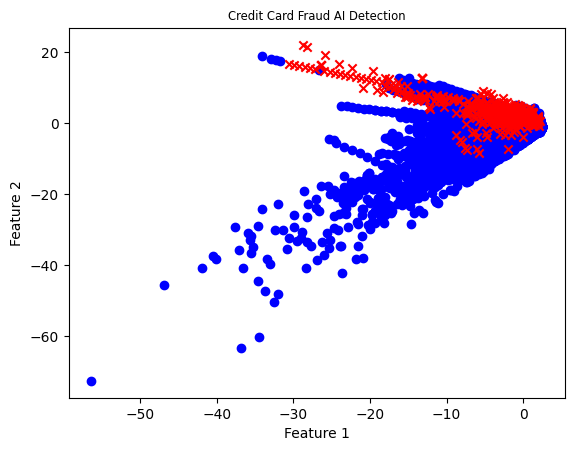

In [77]:
#Plot data
plt.scatter(Xnofraud['V1'], Xnofraud['V2'], color="blue", marker='o', label='no fraud')
plt.scatter(Xfraud['V1'], Xfraud['V2'], color="red", marker='x', label='fraud')

#Label graph
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Credit Card Fraud AI Detection", fontsize="small")